In [23]:
documents = []

ego_id = '203226736'

file = open('/home/amaury/Lucas/n2/textos_tradados/egos/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

file = open('/home/amaury/Lucas/n2/textos_tradados/alters/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 500 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [25]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10
learning_decay = .9
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,learning_decay = learning_decay).fit(tf)

In [26]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [27]:
no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

Topic #0: thank trump2016 news trumptrain maga
Topic #1: president obama trump need tonight
Topic #2: people know love democrats stop
Topic #3: new want obama state watch
Topic #4: amp time today day great
Topic #5: right kids true thing realdonaldtrump
Topic #6: trump clinton hillary donald fbi
Topic #7: american good think attack 2016
Topic #8: like vote look women got
Topic #9: america make world amp big



In [28]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = [str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
0,0.02,0.02,0.02,0.85,0.02,0.02,0.02,0.02,0.02,0.02,3
1,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1
2,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,3
3,0.03,0.03,0.77,0.03,0.03,0.03,0.03,0.03,0.03,0.03,2
4,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,5
5,0.03,0.77,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,1
6,0.03,0.03,0.03,0.03,0.03,0.7,0.03,0.03,0.03,0.03,5
7,0.03,0.03,0.03,0.03,0.03,0.03,0.7,0.03,0.03,0.03,6
8,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2
9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0


In [29]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,1545
1,6,1217
2,4,940
3,3,674
4,1,649
5,9,644
6,2,613
7,7,526
8,5,385
9,8,376


In [34]:
df_topic_distribution = df_document_topic['dominant_topic']
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
i = 0
for doc in df_topic_distribution:
    if doc == 9:
        print(documents[i])
    i = i + 1


It took week climb Kilimanjaro take 3 mins 

HE S GOT A HEART ON HIS NOSE 

Don make angry 

I Mexican Does change assumptions via diversity 

gonna share 

Amazing Blue Iceberg washed volcanic beaches Iceland 

When housing market crashed Mnuchin saw Opportunity make amp investors even money RiggedCabi 

I fled Russia Did forget photos seat flying OUT Russia You blocked passport I c 

Eight billionaires rich half world population study 

Corruption amp Subversion The Enemy Within Bribes Bore Hole U S Border 

Puppies bring greatest joy 

Both FBI ODNI state share CIA view Russia amp election Reuters 

We get mainstream media want see Congress fails find Big Government hide sec 

RT When told use colored pencils make portrait 

Yes adorable also part serious line defense keep contraband US Don miss story Beagle Brig 

Oregon official shut bakery declining make wedding cake lost election Republican 

Don sleep phone 

Today I asking vote Tomorrow let make history together Hillary 

girl

In [31]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

/usr/local/lib/python3.5/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
6      15.236305        1       1  179.621292  101.774734
0      13.279840        1       2  239.179779 -126.764587
4      12.358569        1       3 -215.513748  138.201157
9      10.035332        1       4  -61.401817   48.806068
3       9.674527        1       5 -254.466019  -67.103012
1       8.847148        1       6  -76.826622 -123.779266
7       8.676969        1       7   80.106834  -50.629803
2       8.379226        1       8 -157.803726 -279.487518
8       7.014773        1       9    8.251938  214.365662
5       6.497312        1      10   66.092415 -257.053314, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
24    Default  618.000000              amp  618.000000  30.0000  30.0000
442   Default  826.000000            trump  826.000000  29.0000  29.0000
279   Default  389.000000              new  389.000000  28.0000  28.0000
303   Default  271.000000           people  271.000000  27.0000  27.0000
68    Default  348.000000          clinton  348.000000  26.0000  26.0000
322   Default  236.000000        president  236.000000  25.0000  25.0000
234   Default  193.000000             like  193.000000  24.0000  24.0000
185   Default  292.000000          hillary  292.000000  23.0000  23.0000
20    Default  234.000000          america  234.000000  22.0000  22.0000
249   Default  201.000000             make  201.000000  21.0000  21.0000
430   Default  238.000000             time  238.000000  20.0000  20.0000
422   Default  268.000000            thank  268.000000  19.0000  19.0000
432   Default  228.000000            today  228.000000  18.0000  18.0000
354   Default  138.000000            right  138.000000  17.0000  17.0000
443   Default  185.000000        trump2016  185.000000  16.0000  16.0000
90    Default  185.000000              day  185.000000  15.0000  15.0000
285   Default  208.000000            obama  208.000000  14.0000  14.0000
280   Default  173.000000             news  173.000000  13.0000  13.0000
22    Default  138.000000         american  138.000000  12.0000  12.0000
221   Default  128.000000             know  128.000000  11.0000  11.0000
445   Default  163.000000       trumptrain  163.000000  10.0000  10.0000
164   Default  126.000000             good  126.000000   9.0000   9.0000
246   Default  121.000000             love  121.000000   8.0000   8.0000
169   Default  283.000000            great  283.000000   7.0000   7.0000
247   Default  145.000000             maga  145.000000   6.0000   6.0000
492   Default  142.000000            world  142.000000   5.0000   5.0000
462   Default  141.000000             vote  141.000000   4.0000   4.0000
241   Default   95.000000             look   95.000000   3.0000   3.0000
426   Default  109.000000            think  109.000000   2.0000   2.0000
277   Default  105.000000             need  105.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
160   Topic10   46.730265             gets   48.241171   2.7020  -3.6595
276   Topic10   41.563483           nature   43.026067   2.6992  -3.7767
408   Topic10   35.960399          supreme   37.463450   2.6928  -3.9215
453   Topic10   31.232336       understand   32.678935   2.6885  -4.0625
26    Topic10   50.475753              art   52.892084   2.6870  -3.5824
376   Topic10   28.289076              set   29.665198   2.6863  -4.1614
349   Topic10   27.182049        reporting   28.562010   2.6843  -4.2014
466   Topic10   28.617662             wait   30.087435   2.6837  -4.1499
290   Topic10   26.166291               oh   27.531000   2.6829  -4.2395
339   Topic10   57.172979  realdonaldtrump   60.295988   2.6806  -3.4578
381   Topic10   25.462047      significant   26.857144   2.6804  -4.2667
295   Topic10   22.366562            otter   23.7

Text(0.5, 1.0, 'Segregation of Topic Clusters')

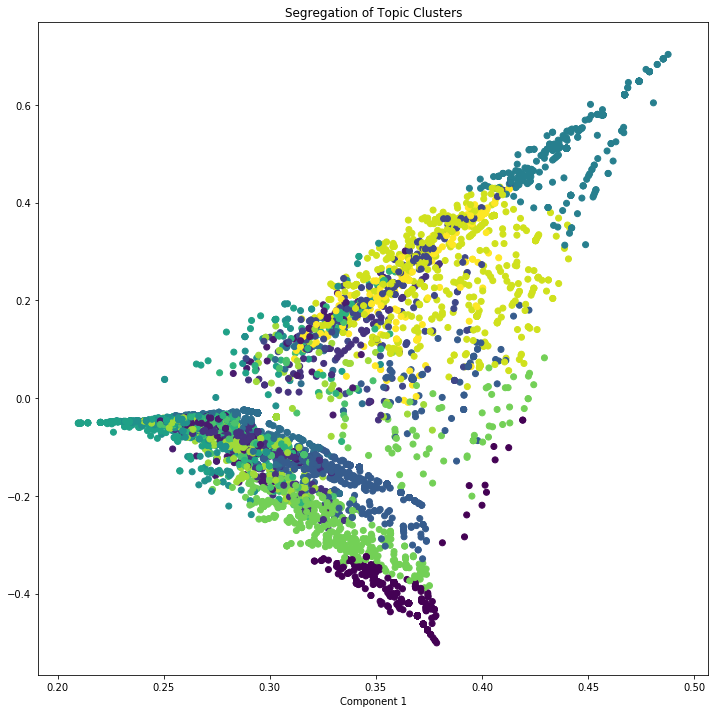

In [32]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )